In [437]:
import re
from google_play_scraper import Sort, reviews
import pandas as pd
from itertools import chain
import json
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [438]:
androidratings = pd.read_csv('android_data.csv')
androidratings.head()

,appId,content,score,thumbsUpCount,category
0,com.herzick.houseparty,I like it so far! It is a great app to use dur...,4,5,social
1,com.herzick.houseparty,I have the OnePlus 7 Pro phone which features ...,2,50,social
2,com.herzick.houseparty,"This is a great app, great concept, my only co...",3,32,social
3,com.herzick.houseparty,It is a very useful and wonderful app over all...,4,0,social
4,com.herzick.houseparty,"Certain parts of this are great, the concept a...",3,165,social


In [439]:
androidratings

,appId,content,score,thumbsUpCount,category
0,com.herzick.houseparty,I like it so far! It is a great app to use dur...,4,5,social
1,com.herzick.houseparty,I have the OnePlus 7 Pro phone which features ...,2,50,social
2,com.herzick.houseparty,"This is a great app, great concept, my only co...",3,32,social
3,com.herzick.houseparty,It is a very useful and wonderful app over all...,4,0,social
4,com.herzick.houseparty,"Certain parts of this are great, the concept a...",3,165,social
5,com.herzick.houseparty,I've used this app just once while talking wit...,5,98,social
6,com.herzick.houseparty,Great. Very reminiscent of Skype on computers ...,4,73,social
7,com.herzick.houseparty,"Fine for quick video chats, but I can't turn o...",2,109,social
8,com.herzick.houseparty,Cool app to play simple games with friends or ...,2,77,social
9,com.herzick.houseparty,"I don't rate apps a lot, but I really enjoy th...",5,336,social


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Apps by rating')]

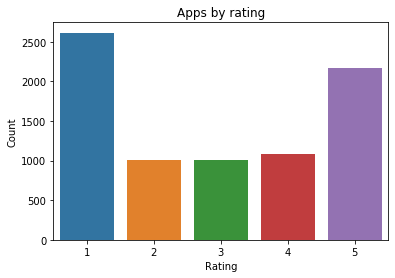

In [440]:
ax = sns.countplot(x = "score", data = androidratings)
ax.set(title = 'Apps by rating', xlabel = 'Rating', ylabel = 'Count')

In [441]:
iosratings = pd.read_csv('ios.csv')
iosratings.head()

,appid,id,score,text,title,url,userName,userUrl,version
0,454638411,5894396330,1,I am literally writing this after this app cra...,Absolutely terrible,https://itunes.apple.com/us/review?id=45463841...,natalijapav,https://itunes.apple.com/us/reviews/id930309969,262.1
1,454638411,5849275727,2,"Soooo, no matter what, this app can’t be bypas...",Give the people what they want,https://itunes.apple.com/us/review?id=45463841...,Aye K,https://itunes.apple.com/us/reviews/id623368587,261.1
2,454638411,5783600952,1,"Well did an update on Tuesday, & it hasn’t wor...",Please fix...,https://itunes.apple.com/us/review?id=45463841...,Nana's Girl,https://itunes.apple.com/us/reviews/id129594532,258.0
3,454638411,5761166297,1,The new update is absolutely disgusting. It ma...,"New Update is Trash, Useless (iOS)",https://itunes.apple.com/us/review?id=45463841...,Lady Ash A.,https://itunes.apple.com/us/reviews/id828113806,258.0
4,454638411,5699902519,3,I don’t do reviews at all but messenger for th...,Messenger may have a problem,https://itunes.apple.com/us/review?id=45463841...,Otaku_weirdness,https://itunes.apple.com/us/reviews/id1037795414,256.0


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Apps by rating')]

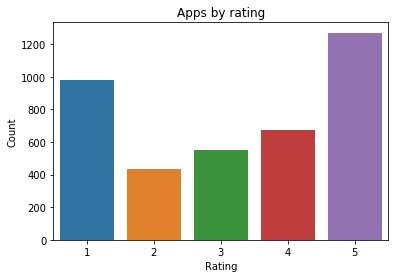

In [442]:
ax = sns.countplot(x = "score", data = iosratings)
ax.set(title = 'Apps by rating', xlabel = 'Rating', ylabel = 'Count')

In [443]:
education = pd.read_csv('education.csv')
education.head()

,id,appId,title,icon,url,price,currency,free,description,developer,developerUrl,developerId,genre,genreId,released
0,924620788,com.google.Classroom,Google Classroom,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/google-classroom...,0,USD,True,"Classroom is a free service for schools, non-p...",Google LLC,https://apps.apple.com/us/developer/google-llc...,281956209?uo=2,Education,6017,2015-01-13T00:00:00-07:00
1,1252497129,cn.danatech.xingseus,PictureThis - Plant Identifier,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/picturethis-plan...,0,USD,True,"Instantly identify plants. Accurate, fast and ...",Glority Global Group Ltd.,https://apps.apple.com/us/developer/glority-gl...,1499301607?uo=2,Education,6017,2017-07-20T03:21:00-07:00
2,919087726,com.microblink.PhotoMath,Photomath,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/photomath/id9190...,0,USD,True,"Learn math, check homework and study for upcom...","Photomath, Inc.",https://apps.apple.com/us/developer/photomath-...,901413062?uo=2,Education,6017,2014-10-17T06:56:43-07:00
3,1014164514,org.socratic.Socratic,Socratic by Google,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/socratic-by-goog...,0,USD,True,Need to get unstuck? Socratic can help! This l...,Google LLC,https://apps.apple.com/us/developer/google-llc...,281956209?uo=2,Education,6017,2015-07-09T11:18:32-07:00
4,756972930,com.LTML.Flipgrid,Flipgrid.,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/flipgrid/id75697...,0,USD,True,Flipgrid is where social learning happens. Use...,"Flipgrid, Inc.",https://apps.apple.com/us/developer/flipgrid-i...,1032859948?uo=2,Education,6017,2013-11-21T20:32:33-07:00


In [444]:
education

,id,appId,title,icon,url,price,currency,free,description,developer,developerUrl,developerId,genre,genreId,released
0,924620788,com.google.Classroom,Google Classroom,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/google-classroom...,0,USD,True,"Classroom is a free service for schools, non-p...",Google LLC,https://apps.apple.com/us/developer/google-llc...,281956209?uo=2,Education,6017,2015-01-13T00:00:00-07:00
1,1252497129,cn.danatech.xingseus,PictureThis - Plant Identifier,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/picturethis-plan...,0,USD,True,"Instantly identify plants. Accurate, fast and ...",Glority Global Group Ltd.,https://apps.apple.com/us/developer/glority-gl...,1499301607?uo=2,Education,6017,2017-07-20T03:21:00-07:00
2,919087726,com.microblink.PhotoMath,Photomath,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/photomath/id9190...,0,USD,True,"Learn math, check homework and study for upcom...","Photomath, Inc.",https://apps.apple.com/us/developer/photomath-...,901413062?uo=2,Education,6017,2014-10-17T06:56:43-07:00
3,1014164514,org.socratic.Socratic,Socratic by Google,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/socratic-by-goog...,0,USD,True,Need to get unstuck? Socratic can help! This l...,Google LLC,https://apps.apple.com/us/developer/google-llc...,281956209?uo=2,Education,6017,2015-07-09T11:18:32-07:00
4,756972930,com.LTML.Flipgrid,Flipgrid.,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/flipgrid/id75697...,0,USD,True,Flipgrid is where social learning happens. Use...,"Flipgrid, Inc.",https://apps.apple.com/us/developer/flipgrid-i...,1032859948?uo=2,Education,6017,2013-11-21T20:32:33-07:00
5,570060128,com.duolingo.DuolingoMobile,Duolingo - Language Lessons,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/duolingo-languag...,0,USD,True,"Want to learn a new language? It’s now fun, en...",Duolingo,https://apps.apple.com/us/developer/duolingo/i...,570060151?uo=2,Education,6017,2012-11-13T00:00:00-07:00
6,467329677,com.bagatrix.mathway,Mathway,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/mathway/id467329...,0,USD,True,With millions of users and billions of problem...,"Mathway, LLC",https://apps.apple.com/us/developer/mathway-ll...,467329680?uo=2,Education,6017,2012-09-03T17:39:33-07:00
7,1131203560,no.mobitroll.kahoot.controller,Kahoot! Play & Create Quizzes,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/kahoot-play-crea...,0,USD,True,"Create your own quizzes in seconds, play anywh...",Kahoot! AS,https://apps.apple.com/us/developer/kahoot-as/...,1131203559?uo=2,Education,6017,2016-09-19T17:26:41-07:00
8,875063456,com.elevateapp.elevate,Elevate - Brain Training,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/elevate-brain-tr...,0,USD,True,Elevate was selected by Apple as App of the Ye...,"Elevate, Inc.",https://apps.apple.com/us/developer/elevate-in...,875063459?uo=2,Education,6017,2014-05-21T21:30:50-07:00
9,919598209,com.edpuzzle.EDpuzzle,Edpuzzle,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/us/app/edpuzzle/id91959...,0,USD,True,"With the Edpuzzle app, your students can benef...","EDpuzzle, Inc.",https://apps.apple.com/us/developer/edpuzzle-i...,919598208?uo=2,Education,6017,2014-09-28T09:37:55-07:00


In [445]:
ioscategory=pd.read_csv('ios_category.csv')
ioscategory.head(10)


,appid,id,score,text,title,url,userName,userUrl,version,category
0,454638411,5894396330,1,I am literally writing this after this app cra...,Absolutely terrible,https://itunes.apple.com/us/review?id=45463841...,natalijapav,https://itunes.apple.com/us/reviews/id930309969,262.1,social
1,454638411,5849275727,2,"Soooo, no matter what, this app can’t be bypas...",Give the people what they want,https://itunes.apple.com/us/review?id=45463841...,Aye K,https://itunes.apple.com/us/reviews/id623368587,261.1,social
2,454638411,5783600952,1,"Well did an update on Tuesday, & it hasn’t wor...",Please fix...,https://itunes.apple.com/us/review?id=45463841...,Nana's Girl,https://itunes.apple.com/us/reviews/id129594532,258.0,social
3,454638411,5761166297,1,The new update is absolutely disgusting. It ma...,"New Update is Trash, Useless (iOS)",https://itunes.apple.com/us/review?id=45463841...,Lady Ash A.,https://itunes.apple.com/us/reviews/id828113806,258.0,social
4,454638411,5699902519,3,I don’t do reviews at all but messenger for th...,Messenger may have a problem,https://itunes.apple.com/us/review?id=45463841...,Otaku_weirdness,https://itunes.apple.com/us/reviews/id1037795414,256.0,social
5,454638411,5290519753,3,There needs to be a better notification when s...,A couple things need to be fixed,https://itunes.apple.com/us/review?id=45463841...,Amanda Hazelnut,https://itunes.apple.com/us/reviews/id387328761,245.1,social
6,454638411,5628934498,1,Facebook and messenger are always changing. Th...,New update is horrible,https://itunes.apple.com/us/review?id=45463841...,RbkhWllc,https://itunes.apple.com/us/reviews/id656407125,254.1,social
7,454638411,5572276909,1,"The title seems harsh, but you need to know ho...",New Update is Absolutely Horrible,https://itunes.apple.com/us/review?id=45463841...,bfstkkbbdsrhkmnbbf,https://itunes.apple.com/us/reviews/id670365113,252.1,social
8,454638411,5599301863,1,Cmon people. Seriously stop with the completel...,Stop making unnecessary changes,https://itunes.apple.com/us/review?id=45463841...,yasmine725,https://itunes.apple.com/us/reviews/id706182061,253.3,social
9,454638411,5788124258,3,I feel as if that app deserved 3 stars from us...,Fair review.,https://itunes.apple.com/us/review?id=45463841...,Kacey2017,https://itunes.apple.com/us/reviews/id1125373681,258.0,social


In [446]:
len(ioscategory)

3901

In [447]:
len(androidratings)

7872

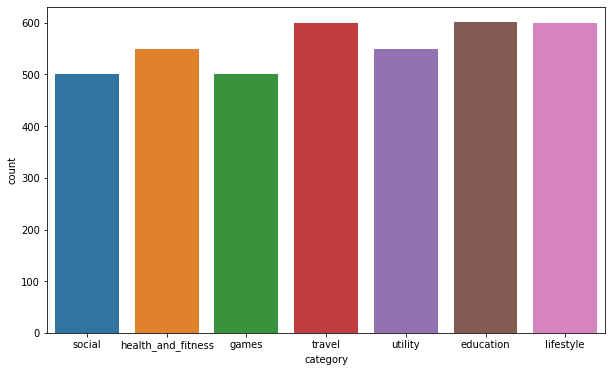

In [448]:
plt.figure(figsize=(10,6))
sns.countplot(x = "category", data = ioscategory)
ax.set(title = 'Apps by category', xlabel = 'Rating', ylabel = 'Count')
plt.show()

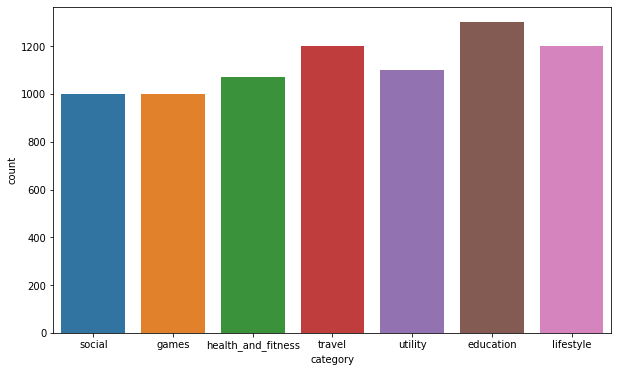

In [449]:
plt.figure(figsize=(10,6))
sns.countplot(x = "category", data = androidratings)
ax.set(title = 'Apps by category', xlabel = 'Rating', ylabel = 'Count')
plt.show()

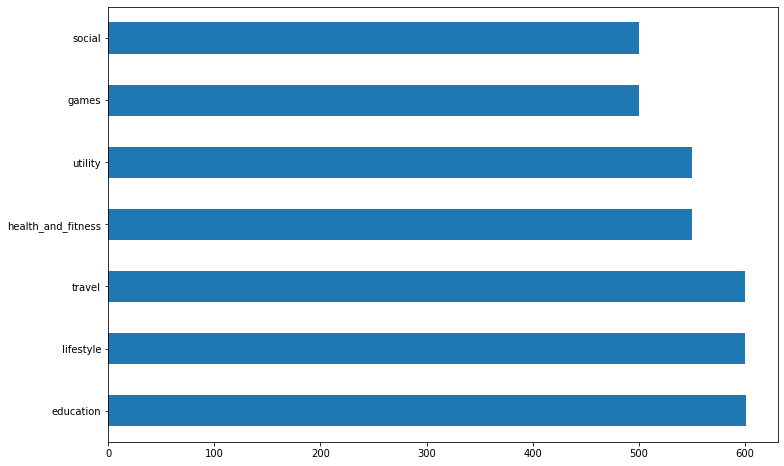

In [450]:
ioscategory.category.value_counts().plot(kind='barh',figsize= (12,8))

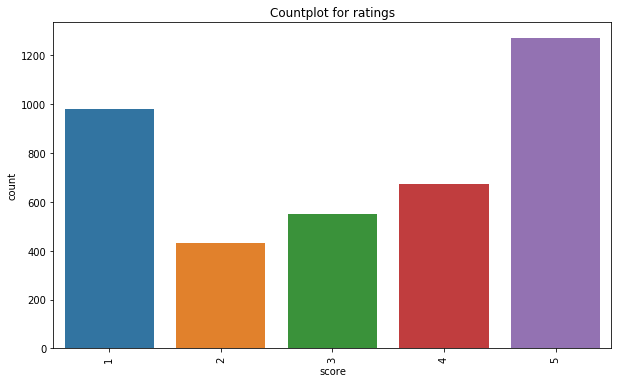

In [451]:
plt.figure(figsize=(10,6))
sns.countplot(x='score',data = ioscategory)
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

In [452]:
#change_Values = { 'social' : 10,
#'games':20,
#'utility':30, 
#'health_and_fitness':40,
#'travel' :50,
#'lifestyle' :60,
#'education':70 }
#ioscategory['category'] = ioscategory['category'].replace(change_Values)
#ioscategory.head()

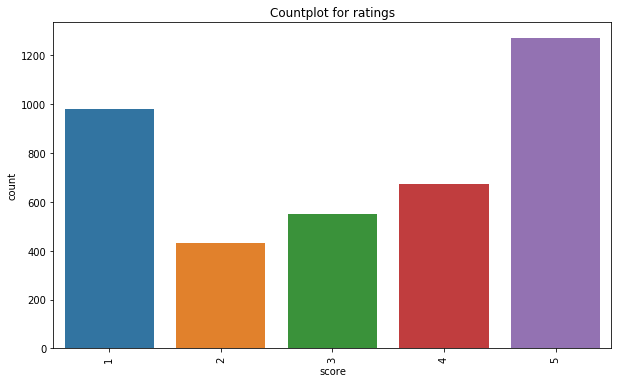

In [453]:
plt.figure(figsize=(10,6))
sns.countplot(x='score',data = ioscategory)
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

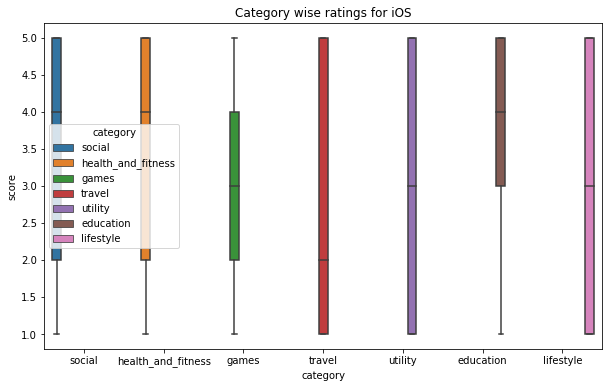

In [454]:
plt.figure(figsize=(10,6))
sns.boxplot(x=ioscategory["category"], y=ioscategory["score"],hue=ioscategory['category'])
plt.title('Category wise ratings for iOS')
plt.show()

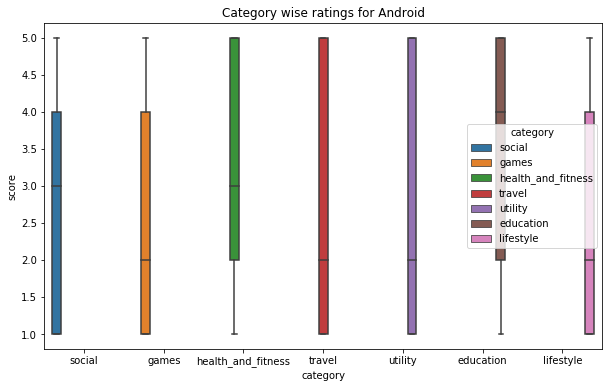

In [455]:
plt.figure(figsize=(10,6))
sns.boxplot(x=androidratings["category"], y=androidratings["score"],hue=androidratings['category'])
plt.title('Category wise ratings for Android')
plt.show()

In [456]:
xls = pd.ExcelFile('androidReviewSentimentSingle1.xlsx')
androidsentiment=pd.read_excel(xls)
androidsentiment

,Unnamed: 0,appid,category,rating,review,sentiment
0,0,com.herzick.houseparty,social,4,I like it so far! It is a great app to use dur...,positive
1,1,com.herzick.houseparty,social,2,I have the OnePlus 7 Pro phone which features ...,positive
2,2,com.herzick.houseparty,social,3,"This is a great app, great concept, my only co...",positive
3,3,com.herzick.houseparty,social,4,It is a very useful and wonderful app over all...,positive
4,4,com.herzick.houseparty,social,3,"Certain parts of this are great, the concept a...",neutral
5,5,com.herzick.houseparty,social,5,I've used this app just once while talking wit...,positive
6,6,com.herzick.houseparty,social,4,Great. Very reminiscent of Skype on computers ...,positive
7,7,com.herzick.houseparty,social,2,"Fine for quick video chats, but I can't turn o...",positive
8,8,com.herzick.houseparty,social,2,Cool app to play simple games with friends or ...,negative
9,9,com.herzick.houseparty,social,5,"I don't rate apps a lot, but I really enjoy th...",positive


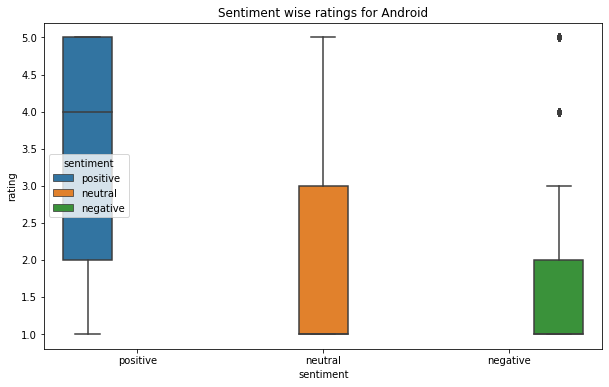

In [457]:
plt.figure(figsize=(10,6))
sns.boxplot(x=androidsentiment["sentiment"], y=androidsentiment["rating"],hue=androidsentiment['sentiment'])
plt.title('Sentiment wise ratings for Android')
plt.show()

In [458]:
xls1 = pd.ExcelFile('iOSReviewSentimentSingle1.xlsx')
iossentiment=pd.read_excel(xls1)
iossentiment

,Unnamed: 0,appid,category,rating,review,sentiment
0,0,454638411,social,1,I am literally writing this after this app cra...,positive
1,1,454638411,social,2,"Soooo, no matter what, this app can’t be bypas...",positive
2,2,454638411,social,1,"Well did an update on Tuesday, & it hasn’t wor...",positive
3,3,454638411,social,1,The new update is absolutely disgusting. It ma...,neutral
4,4,454638411,social,3,I don’t do reviews at all but messenger for th...,negative
5,5,454638411,social,3,There needs to be a better notification when s...,neutral
6,6,454638411,social,1,Facebook and messenger are always changing. Th...,negative
7,7,454638411,social,1,"The title seems harsh, but you need to know ho...",positive
8,8,454638411,social,1,Cmon people. Seriously stop with the completel...,negative
9,9,454638411,social,3,I feel as if that app deserved 3 stars from us...,positive


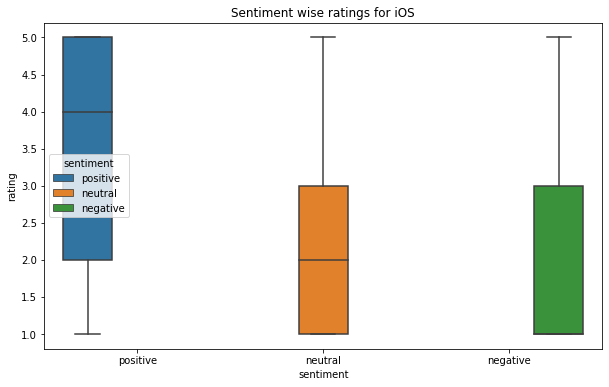

In [459]:
plt.figure(figsize=(10,6))
sns.boxplot(x=iossentiment["sentiment"], y=iossentiment["rating"],hue=iossentiment['sentiment'])
plt.title('Sentiment wise ratings for iOS')
plt.show()

In [368]:
#ax1 = androidsentiment.plot.scatter(x='sentiment', y='category')

In [408]:
change_Values = { 'positive' : 2,
'neutral':1,
'negative':0 }
androidsentiment['sentiment'] = androidsentiment['sentiment'].replace(change_Values)
androidsentiment.head()


,Unnamed: 0,appid,category,rating,review,sentiment
0,0,com.herzick.houseparty,social,4,I like it so far! It is a great app to use dur...,2
1,1,com.herzick.houseparty,social,2,I have the OnePlus 7 Pro phone which features ...,2
2,2,com.herzick.houseparty,social,3,"This is a great app, great concept, my only co...",2
3,3,com.herzick.houseparty,social,4,It is a very useful and wonderful app over all...,2
4,4,com.herzick.houseparty,social,3,"Certain parts of this are great, the concept a...",1


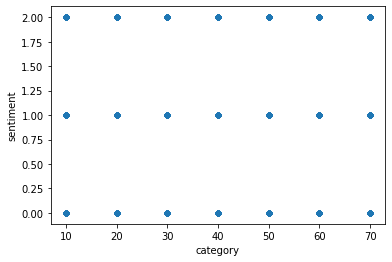

In [433]:
ax1 = androidsentiment.plot.scatter(x='category', y='sentiment')

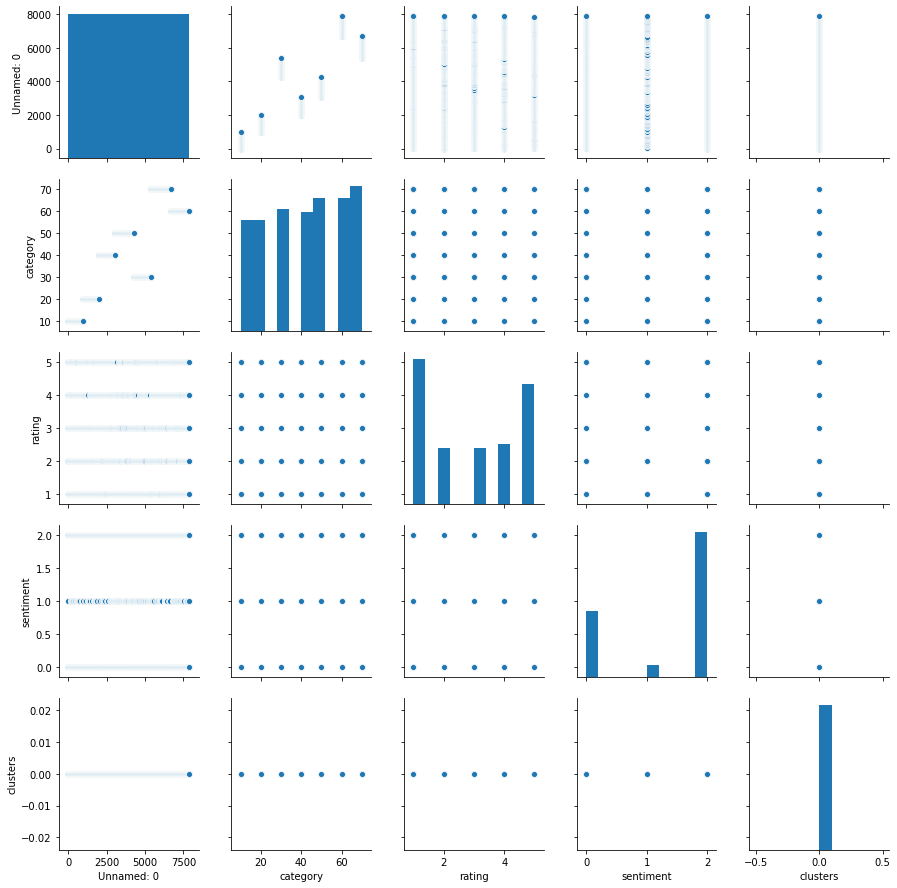

In [436]:
sns.pairplot(androidsentiment);

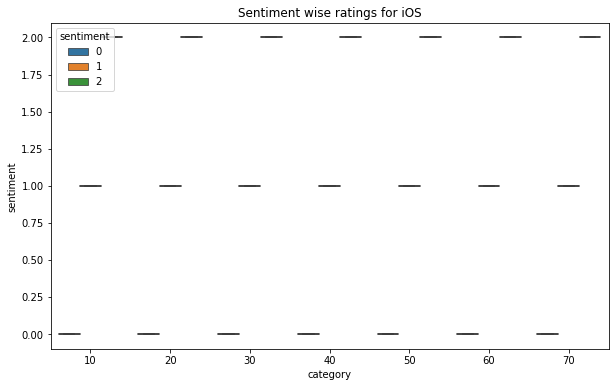

In [431]:
plt.figure(figsize=(10,6))
sns.boxplot(x=androidsentiment["category"], y=androidsentiment["sentiment"],hue=androidsentiment['sentiment'])
plt.title('Sentiment wise ratings for iOS')
plt.show()

In [352]:
#ax1 = ioscategory.plot.scatter(x='score', y='category')

In [410]:
change_Values = { 'social' : 10,
'games':20,
'utility':30, 
'health_and_fitness':40,
'travel' :50,
'lifestyle' :60,
'education':70 }
androidsentiment['category'] = androidsentiment['category'].replace(change_Values)
androidsentiment.head()

,Unnamed: 0,appid,category,rating,review,sentiment
0,0,com.herzick.houseparty,10,4,I like it so far! It is a great app to use dur...,2
1,1,com.herzick.houseparty,10,2,I have the OnePlus 7 Pro phone which features ...,2
2,2,com.herzick.houseparty,10,3,"This is a great app, great concept, my only co...",2
3,3,com.herzick.houseparty,10,4,It is a very useful and wonderful app over all...,2
4,4,com.herzick.houseparty,10,3,"Certain parts of this are great, the concept a...",1


In [417]:
X = androidsentiment[androidsentiment.columns[2:3]]
Y = androidsentiment[androidsentiment.columns[5]]
X = X.values.reshape((-1, 1))
Y = Y.values.reshape((-1,1))

In [418]:
androidsentiment.columns[2]

'category'

In [419]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [420]:
clustering = DBSCAN(eps = 2, min_samples = 7, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

[Text(0, 0.5, 'category'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Category clusters')]

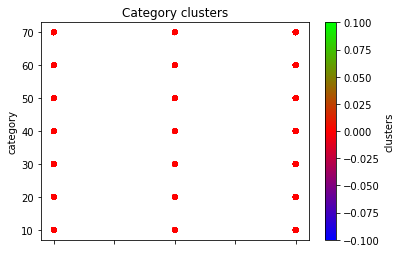

In [423]:
androidsentiment['clusters'] = clusters
ax = androidsentiment.plot(kind = 'scatter', x = 'sentiment', y = 'category', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Category clusters', xlabel = 'Type', ylabel = 'category')

In [175]:
ioscategory

,appid,id,score,text,title,url,userName,userUrl,version,category,clusters
0,454638411,5894396330,1,I am literally writing this after this app cra...,Absolutely terrible,https://itunes.apple.com/us/review?id=45463841...,natalijapav,https://itunes.apple.com/us/reviews/id930309969,262.1,1,0
1,454638411,5849275727,2,"Soooo, no matter what, this app can’t be bypas...",Give the people what they want,https://itunes.apple.com/us/review?id=45463841...,Aye K,https://itunes.apple.com/us/reviews/id623368587,261.1,1,0
2,454638411,5783600952,1,"Well did an update on Tuesday, & it hasn’t wor...",Please fix...,https://itunes.apple.com/us/review?id=45463841...,Nana's Girl,https://itunes.apple.com/us/reviews/id129594532,258.0,1,0
3,454638411,5761166297,1,The new update is absolutely disgusting. It ma...,"New Update is Trash, Useless (iOS)",https://itunes.apple.com/us/review?id=45463841...,Lady Ash A.,https://itunes.apple.com/us/reviews/id828113806,258.0,1,0
4,454638411,5699902519,3,I don’t do reviews at all but messenger for th...,Messenger may have a problem,https://itunes.apple.com/us/review?id=45463841...,Otaku_weirdness,https://itunes.apple.com/us/reviews/id1037795414,256.0,1,0
5,454638411,5290519753,3,There needs to be a better notification when s...,A couple things need to be fixed,https://itunes.apple.com/us/review?id=45463841...,Amanda Hazelnut,https://itunes.apple.com/us/reviews/id387328761,245.1,1,0
6,454638411,5628934498,1,Facebook and messenger are always changing. Th...,New update is horrible,https://itunes.apple.com/us/review?id=45463841...,RbkhWllc,https://itunes.apple.com/us/reviews/id656407125,254.1,1,0
7,454638411,5572276909,1,"The title seems harsh, but you need to know ho...",New Update is Absolutely Horrible,https://itunes.apple.com/us/review?id=45463841...,bfstkkbbdsrhkmnbbf,https://itunes.apple.com/us/reviews/id670365113,252.1,1,0
8,454638411,5599301863,1,Cmon people. Seriously stop with the completel...,Stop making unnecessary changes,https://itunes.apple.com/us/review?id=45463841...,yasmine725,https://itunes.apple.com/us/reviews/id706182061,253.3,1,0
9,454638411,5788124258,3,I feel as if that app deserved 3 stars from us...,Fair review.,https://itunes.apple.com/us/review?id=45463841...,Kacey2017,https://itunes.apple.com/us/reviews/id1125373681,258.0,1,0


In [218]:
clustering = KMeans(n_clusters = 4, init = 'random', n_init = 10, random_state = 0).fit(X_scaled)
clusters = clustering.labels_

[Text(0, 0.5, 'category'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Category clusters')]

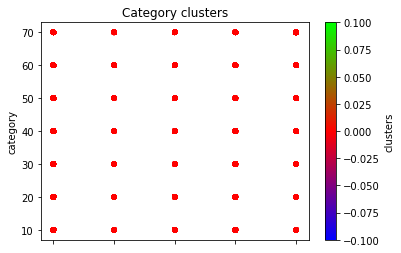

In [427]:
androidsentiment['clusters'] = clusters
ax = androidsentiment.plot(kind = 'scatter', x = 'rating', y = 'category', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Category clusters', xlabel = 'Type', ylabel = 'category')